# Project 2: Implementing a Simple Convolutional Neural Network (CNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Convolutional Neural Network (CNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- CIFAR-10: A dataset of 60,000 32x32 color images in 10 classes with 6,000 images per class.
- MNIST: A dataset of 70,000 28x28 grayscale images of handwritten digits (0-9).
- Fashion-MNIST: A dataset of 70,000 28x28 grayscale images of 10 different clothing caregories.


Files already downloaded and verified
Files already downloaded and verified
[1, 500] loss: 1.918
[1, 1000] loss: 1.670
[1, 1500] loss: 1.558
[2, 500] loss: 1.480
[2, 1000] loss: 1.457
[2, 1500] loss: 1.407
[3, 500] loss: 1.363
[3, 1000] loss: 1.341
[3, 1500] loss: 1.317
[4, 500] loss: 1.293
[4, 1000] loss: 1.275
[4, 1500] loss: 1.276
[5, 500] loss: 1.246
[5, 1000] loss: 1.226
[5, 1500] loss: 1.236
[6, 500] loss: 1.196
[6, 1000] loss: 1.211
[6, 1500] loss: 1.181
[7, 500] loss: 1.177
[7, 1000] loss: 1.156
[7, 1500] loss: 1.179
[8, 500] loss: 1.163
[8, 1000] loss: 1.137
[8, 1500] loss: 1.138
[9, 500] loss: 1.132
[9, 1000] loss: 1.131
[9, 1500] loss: 1.133
[10, 500] loss: 1.133
[10, 1000] loss: 1.131
[10, 1500] loss: 1.097
Finished Training
Accuracy of the network on the 10000 test images: 62.98 %


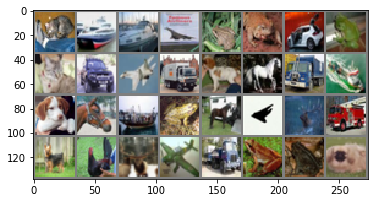

GroundTruth:  cat ship ship plane
Predicted:  cat ship ship plane


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for the training data with data augmentation techniques
# to improve generalization
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # randomly flip images horizontally
    transforms.RandomCrop(32, padding=4),  # randomly crop images with padding
    transforms.ToTensor(),  # convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize the images
])

# Define transformations for the testing data without data augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),  # convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize the images
])

# Load CIFAR10 dataset for training and testing
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Define the neural network architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer: input channels = 3, output channels = 6, kernel size = 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling layer: reduces the size by 2, kernel size = 2, stride = 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer: input channels = 6, output channels = 16, kernel size = 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # First fully connected layer: input features = 16*5*5, output features = 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Second fully connected layer: input features = 120, output features = 84
        self.fc2 = nn.Linear(120, 84)
        # Output layer: input features = 84, output features = 10 (class scores)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply first convolutional layer followed by ReLU activation and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer followed by ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for the fully connected layer
        x = x.view(-1, 16 * 5 * 5)
        # Apply first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Apply second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))
        # Compute the class scores
        return self.fc3(x)

net = SimpleCNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network
num_epochs = 10
for epoch in range(num_epochs):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 500 == 499:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the network
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display some test images and their labels
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# Predict
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


---
### Questions
Answer the following questions in detail.

1. What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.
2. Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?
3. What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?
4. Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.
5. Describe the process of training a CNN. What are some common challenges faced during training?
6. What are some common evaluation metrics used to assess the performance of a CNN on a classification task?
7. How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.


---
### Answers

1. **What is a Convolutional Neural Network (CNN)? Describe its key components and how they differ from those in a fully connected neural network.**
   A CNN is a deep learning algorithm used mainly for processing grid-like data such as images. Key components include convolutional layers, pooling layers, and fully connected layers. Unlike fully connected networks, CNNs have sparse connectivity (local connections only) and shared weights in convolutional layers, which reduce the number of parameters and computational complexity.

2. **Explain the purpose of the convolution operation in a CNN. How does the use of different filter sizes affect the feature maps?**
   The convolution operation in a CNN helps in detecting features such as edges, textures, and shapes within images. Using different filter sizes affects the resolution of the feature maps: larger filters capture more global features of the input, while smaller filters focus on local features, providing finer details.

3. **What is the purpose of a pooling layer in a CNN, and how does it contribute to the network’s performance?**
   The pooling layer in a CNN reduces the spatial dimensions of the feature maps, making the detection of features invariant to scale and orientation changes. This reduction also decreases the computational load and helps prevent overfitting by providing an abstracted form of the features.

4. **Why are activation functions important in CNNs? Compare the use of ReLU (Rectified Linear Unit) with other activation functions.**
   Activation functions introduce non-linearities into the network, which are crucial for learning complex patterns. ReLU is commonly used because it speeds up training without affecting the ability to represent non-linearities. Compared to sigmoid or tanh, ReLU does not suffer from vanishing gradients at higher input values.

5. **Describe the process of training a CNN. What are some common challenges faced during training?**
   Training a CNN involves feeding it input data, performing forward propagation, calculating loss, and using backpropagation to update the weights. Common challenges include overfitting, choosing the appropriate architecture, and managing high computational resource demands.

6. **What are some common evaluation metrics used to assess the performance of a CNN on a classification task?**
   Common metrics include accuracy, precision, recall, F1 score, and confusion matrix. For multi-class classification, metrics such as multi-class cross-entropy can also be used.

7. **How does data augmentation help improve the performance of a CNN? Provide examples of common data augmentation techniques.**
   Data augmentation artificially expands the training dataset by creating modified versions of images, which helps improve the robustness and generalization of the model. Common techniques include rotations, translations, flipping, scaling, and color variation.
